In [2]:
import networkx as nx
%matplotlib inline

Outline:
* plotting nodes/edges
* graph layouts
* colors
* plotting with edge/node attributes

# Plotting nodes and edges

In [3]:
G = nx.Graph()                               #create a graph
G.add_nodes_from([0,1,2,3])                  #add some nodes
G.add_edges_from([(0,1),(1,2),(2,3),(3,0)])  #add some edges
pos = {0:[1,1],1:[1,2],2:[2,3],3:[3,2]}      #dictionary of positions
       

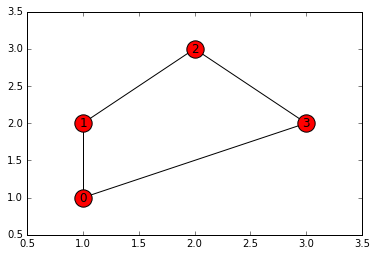

In [4]:
nx.draw_networkx(G,pos)     #plot edges as lines, nodes as dots + labels

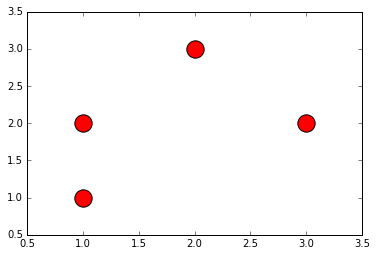

In [5]:
nx.draw_networkx_nodes(G,pos)     #plot only the nodes 

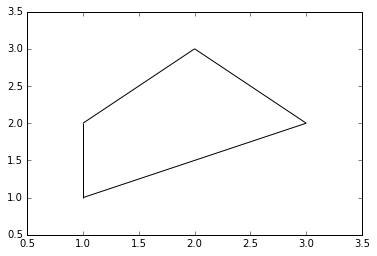

In [6]:
nx.draw_networkx_edges(G,pos)    #plot only the edges

# Graph layouts

Creating a position-dictionary each time is tedious.
Sometimes graphs don't even have a geometry to use.
Thankfully NetworkX provides us with some standard layouts to plot graphs.
* circular_layout - positions nodes on a circle
* random_layout - chooses random but uniform positions in a unit square
* shell_layout - positions nodes in concentric circles
* spring_layout - few crossings, edges of more or less equal length
* spectral_layout - uses eigenvectors of the graphs laplacian as coordinates

In [7]:
#random graph with edge probability of 0.3
G = nx.gnp_random_graph(20,0.3)   

{0: array([ 1.,  0.]), 1: array([ 0.95105652,  0.30901699]), 2: array([ 0.80901699,  0.58778525]), 3: array([ 0.58778525,  0.80901699]), 4: array([ 0.30901699,  0.95105652]), 5: array([  6.12323400e-17,   1.00000000e+00]), 6: array([-0.30901699,  0.95105652]), 7: array([-0.58778525,  0.80901699]), 8: array([-0.80901699,  0.58778525]), 9: array([-0.95105652,  0.30901699]), 10: array([ -1.00000000e+00,   1.22464680e-16]), 11: array([-0.95105652, -0.30901699]), 12: array([-0.80901699, -0.58778525]), 13: array([-0.58778525, -0.80901699]), 14: array([-0.30901699, -0.95105652]), 15: array([ -1.83697020e-16,  -1.00000000e+00]), 16: array([ 0.30901699, -0.95105652]), 17: array([ 0.58778525, -0.80901699]), 18: array([ 0.80901699, -0.58778525]), 19: array([ 0.95105652, -0.30901699])}


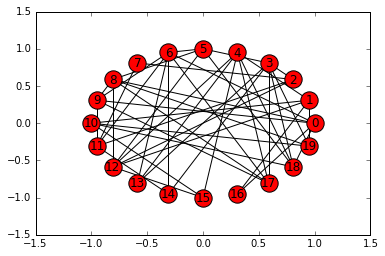

In [9]:
pos_circular = nx.circular_layout(G)
nx.draw_networkx(G,pos_circular)
print(pos_circular)

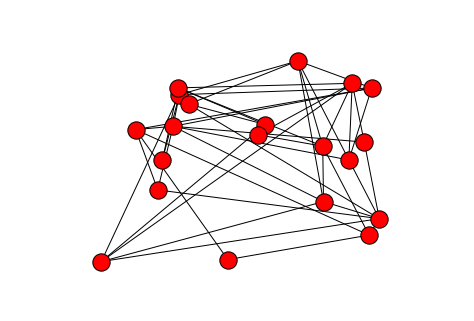

In [10]:
pos_random = nx.random_layout(G)
nx.draw(G,pos_random)

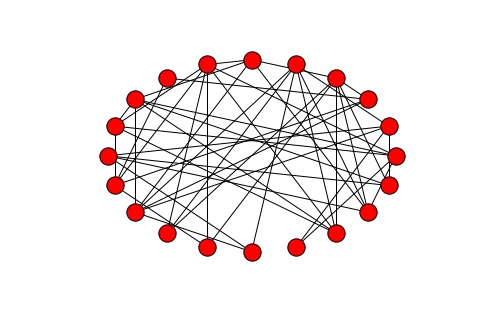

In [12]:
pos_shell = nx.shell_layout(G)
nx.draw(G,pos_shell)

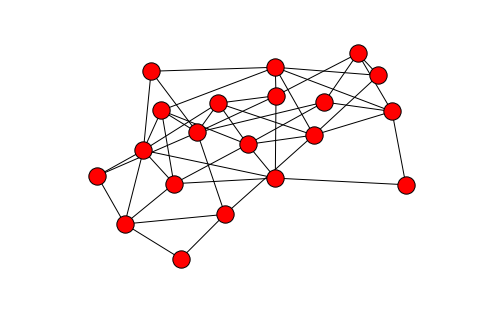

In [13]:
pos_spring = nx.spring_layout(G)
nx.draw(G,pos_spring)

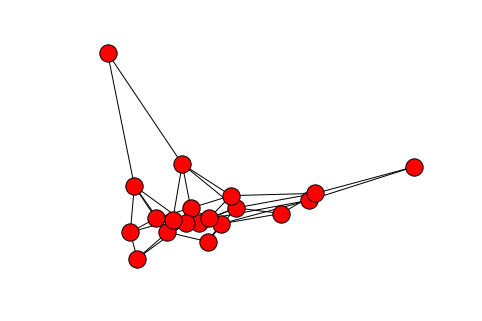

In [14]:
pos_spectral = nx.spectral_layout(G)
nx.draw(G,pos_spectral)

## Draw only specific nodes

Now we want to plot only the nodes [3,4,5,6] and all edges connected to them

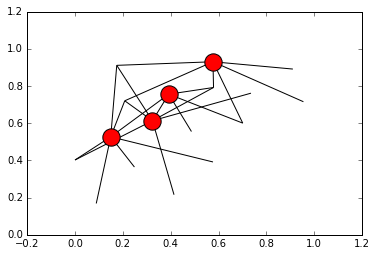

In [15]:
nodes = [3,4,5,6]
edges = [e for e in G.edges() if e[0] in nodes or e[1] in nodes]
nx.draw_networkx_nodes(G,pos_spring, nodelist=nodes)
nx.draw_networkx_edges(G,pos_spring,edgelist=edges)

# Colors

Nearly all of matplotlib's options for color, transparency etc. can be used via NetworkX's draw-functions:
* modify node size and shape via the keyword-arguments `node_size` and `node_shape`
* modify node color via `node_color` or providing a `cmap`
* modify edge width and style via `width` and `style`
* modify edge color via `edge_color` and `edge_cmap`
* modify transparency via `alpha`

### colorful example 

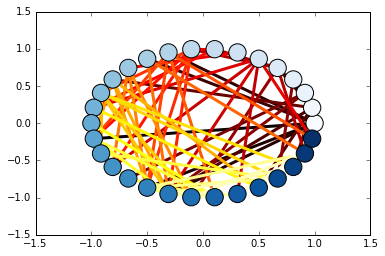

In [17]:
import matplotlib.pyplot as plt
G = nx.gnp_random_graph(30,0.15)
pos = nx.circular_layout(G)
blues = plt.cm.Blues
reds = plt.cm.hot
nx.draw_networkx_nodes(G,pos,node_color=range(30),cmap=blues)
nx.draw_networkx_edges(G,pos,edge_color=range(len(G.edges())),edge_cmap=reds,width=3)

# Plotting with node/edge attributes

We can store attrobutes for nodes and edges by assigning vaules in the node/edge dictionaries, remember?

In [19]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.node[1]['mood'] = 'happy'
G.node[2]['mood'] = 'sad'
G.node[3]['mood'] = 'bored'
G.node[4]['x'] = 2.0

In [20]:
G.node[1]['mood']

'happy'

In [22]:
G.node[4]['x']

2.0

In [25]:
G = nx.read_graphml("../data/visualization/medium_graph.xml")
print(len(G.nodes()))

1032


In [7]:
G.nodes(data=True)

[('2300', {'conductivity': 10.0, 'x': 698.200012207, 'y': 781.599975586}),
 ('687', {'conductivity': 7.0, 'x': 416.5, 'y': 821.0}),
 ('4825', {'conductivity': 9.0, 'x': 826.299987793, 'y': 582.0}),
 ('3911', {'conductivity': 6.0, 'x': 1018.0, 'y': 1046.0}),
 ('4884', {'conductivity': 7.0, 'x': 915.0, 'y': 493.5}),
 ('5436', {'conductivity': 7.0, 'x': 1150.5, 'y': 438.5}),
 ('2327', {'conductivity': 6.0, 'x': 737.5, 'y': 722.0}),
 ('5495', {'conductivity': 7.0, 'x': 1035.0, 'y': 401.5}),
 ('732', {'conductivity': 6.0, 'x': 557.5, 'y': 1338.5}),
 ('4180', {'conductivity': 5.0, 'x': 1142.5, 'y': 913.0}),
 ('1648', {'conductivity': 6.0, 'x': 495.0, 'y': 684.5}),
 ('5504', {'conductivity': 6.0, 'x': 1053.0, 'y': 420.5}),
 ('4982', {'conductivity': 7.0, 'x': 819.0, 'y': 252.0}),
 ('1343', {'conductivity': 6.0, 'x': 681.5, 'y': 854.5}),
 ('5158', {'conductivity': 6.0, 'x': 993.5, 'y': 779.0}),
 ('773', {'conductivity': 7.0, 'x': 608.5, 'y': 1361.0}),
 ('4945', {'conductivity': 6.0, 'x': 854.0

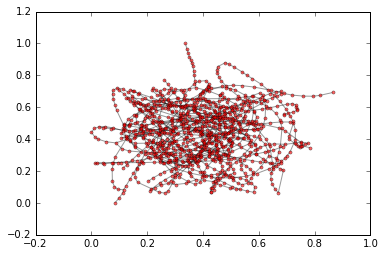

In [27]:
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G,pos,edgecolor="DarkSlateGray",alpha =0.4)
nx.draw_networkx_nodes(G,pos,color="FireBrick",alpha=0.6,node_size=10,linewidths=0.5)

In [31]:
pos = {}
for k in G.node.keys():
    pos[k] = (G.node[k]['x'],G.node[k]['y'])
print(pos)

{'3325': (820.5, 919.5), '342': (495.0, 1045.0), '3030': (984.5, 1278.5), '1195': (623.0, 829.0), '2427': (707.5, 790.0), '4407': (802.0, 740.5), '5564': (1208.5, 617.0), '629': (358.5, 794.0), '3388': (960.5, 1071.0), '5349': (1303.5, 723.0), '4655': (784.0, 523.5), '382': (270.0, 943.0), '2318': (712.5, 771.5), '5148': (1087.59997559, 827.5), '3550': (1000.0, 1281.0), '2272': (683.0, 778.5), '4672': (805.5, 584.0), '456': (267.5, 847.5), '4081': (1136.19995117, 1015.40002441), '4036': (1053.0, 933.5), '2747': (702.0, 305.5), '4189': (1165.5, 918.5), '462': (254.0, 824.5), '5235': (1181.0, 893.5), '4144': (1214.0, 1012.0), '5180': (1108.5, 884.5), '597': (454.0, 980.5), '1710': (486.5, 667.0), '2772': (763.5, 1396.3999939), '4449': (856.5, 838.0), '4755': (788.0, 314.0), '3244': (767.5, 972.0), '593': (460.5, 989.5), '5604': (1246.5, 681.0), '4098': (1148.0, 1021.5), '2653': (727.0, 595.0), '3987': (1008.0, 963.0), '4918': (812.0, 296.5), '294': (463.0, 1080.0), '2411': (702.0, 621.0)

In [32]:
import matplotlib.pyplot as plt


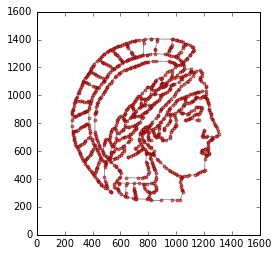

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,edgecolor="DarkSlateGray",alpha=0.4)
nx.draw_networkx_nodes(G,pos,color="FireBrick",alpha=0.6,node_size=10,linewidths=0.5)